<a href="https://colab.research.google.com/github/francobarrionuevoenv21/EEwPython/blob/master/VIIRS_HS_2012_2022_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**In case you are running this code in Colab or don't have installed the libraries, run this cell**

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 35.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 90.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 71.6 MB/s eta 0:00:00


# **Libraries and functions**

#### **Libraries**

##### Libraries for data handling, processing, visualization, and other tools %%%

In [ ]:
# Handling, processing and visualization of data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Handling and processing of georreferenced data
import geopandas as gpd

# Other libraries
from google.colab import files
import matplotlib.lines as mlines

##### Google Drive files access via PyDrive %%%

In [ ]:
# Libraries for files loading 

# Code to read csv file into Colaboratory:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

####**Functions**

##### Here are the functions we'll be using. Please make sure to load this box before running the following ones.

In [ ]:
def FileDataDf(dictFiles, i, source):
  ''' This function allows to open csv files stored either in Google Drive or from a device. 
  It takes as input a dictionary containing files link or path and the index of the element 
  in the dictionary. It also takes a third parameter (source) wich specifies the source 
  of the files'''

  if source == 'gdrive': # Files hosted in Google Drive. 
    FilesPath = list(dictFiles.values())[i]
    idPath = FilesPath.split('/', 6)
    downloadedFiles = drive.CreateFile({'id':idPath[5]}) 
    downloadedFiles.GetContentFile(list(dictFiles.keys())[i])
    dfData = pd.read_csv(list(dictFiles.keys())[i])
  
  elif source == 'other': # Files imported from device or Colab files
    dfData = pd.read_csv(list(dictFiles.values())[i])

  return dfData

def getCoordsSHP(gdfshpFile):
  '''
  This function takes a polygon vector layer file passed as a GeoDataFrame. Then
  it gets all longitude and latitude values and return it as numpy arrays. 
  '''

  gdfiterf = gdfshpFile.iterfeatures()
  tupleFile = next(gdfiterf)['geometry']['coordinates']

  arrayCoords = np.array([list(tupleFile[0][i]) for i in range(len(tupleFile[0]))])

  return arrayCoords[:, 0], arrayCoords[:, 1] #xlong, ylat

# **Data loading**

#### **Creating dictionaries containing files path acces.**
##### Depending on the case, you can choose one option or another: Import files from Google Drive, import from your computer or upload files in Colab. Be aware of comment/uncomment the correct option.

In [ ]:
# Fill this dictionary with files path or link in case you have data in separate files for each year.
# Then, you wil have to merge it. 
'''
dictFilesPath ={
    "1.csv" : "...", # Year 1
    "2.csv" : "...", # Year 2
    "3.csv" : "...", # Year 3
    "n.csv" : "...", # Year n
    }
'''

# Fill this dictionary with file path or link in case you have data unified in a single file. 
dictFilesPath ={ 
    "1.csv" : "https://drive.google.com/file/d/1NYnKfZ1bqWw0jI4hJP40gnfBXYIrvgDY/view?usp=share_link", # Year 1-Year n
    }

####**Loading of data and merging of Dataframes**

##### First look into our Dataframes with function FileDataDf()

In [ ]:
FileDataDf(dictFilesPath, 0, source = 'gdrive').head() # Select the correct source

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,-22.366005,-63.287380,356.43,0.48,0.48,2012-01-20,454,N,VIIRS,n,1,294.52,48.21,N,0
1,-22.367886,-63.278008,329.16,0.48,0.48,2012-01-20,454,N,VIIRS,n,1,292.64,7.12,N,0
2,-22.370424,-63.288437,351.54,0.48,0.48,2012-01-20,454,N,VIIRS,n,1,293.27,8.47,N,0
3,-22.371367,-63.283745,329.69,0.48,0.48,2012-01-20,454,N,VIIRS,n,1,292.36,8.47,N,0
4,-25.268017,-64.125641,327.21,0.48,0.48,2012-01-20,454,N,VIIRS,n,1,290.53,5.83,N,0


##### Loading of files and merging them into a single Dataframe, if needed. 

In [ ]:
listColumns = ['latitude', 'longitude', 'acq_date', 'type']
dfMerge = pd.DataFrame(columns = listColumns) # Empty Dataframe to merge in case of individual datasets for different years

In [ ]:
# Run this cell in case you have different files for each year

for i in range(len(dictFilesPath)):
  dfMerge = pd.concat([dfMerge, FileDataDf(dictFilesPath, i, source = 'other')[listColumns]]) # Select the correct source

dfMerge = dfMerge.reset_index() # To avoid errors, reset indexes in the Dataframe. 

In [ ]:
# Run this cell in case you have an unified file for study period analysis

dfMerge = FileDataDf(dictFilesPath, 0, source = 'gdrive')[listColumns] # Select the correct source

##### Get some basic infor from our new Dataframe elements from the Dataframe

In [ ]:
dfMerge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2246570 entries, 0 to 2246569
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   latitude   float64
 1   longitude  float64
 2   acq_date   object 
 3   type       int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 68.6+ MB


##### Take a look into the first ten and the last ten elements in the Dataframe

In [ ]:
dfMerge.head(10)

,latitude,longitude,acq_date,type
0,-22.366005,-63.287380,2012-01-20,0
1,-22.367886,-63.278008,2012-01-20,0
2,-22.370424,-63.288437,2012-01-20,0
3,-22.371367,-63.283745,2012-01-20,0
4,-25.268017,-64.125641,2012-01-20,0
5,-25.975094,-61.247421,2012-01-20,0
6,-25.978798,-61.248268,2012-01-20,0
7,-26.772268,-58.305458,2012-01-20,3
8,-26.600805,-62.133480,2012-01-20,0
9,-27.752472,-58.684994,2012-01-20,0


In [ ]:
dfMerge.tail(10)

,latitude,longitude,acq_date,type
2246560,-22.156034,-63.939449,2022-08-31,0
2246561,-38.128300,-67.717674,2022-08-31,0
2246562,-38.319286,-68.660591,2022-08-31,0
2246563,-34.902367,-67.716370,2022-08-31,0
2246564,-34.905956,-67.718254,2022-08-31,0
2246565,-34.899258,-67.721275,2022-08-31,0
2246566,-34.891930,-67.820709,2022-08-31,0
2246567,-34.739609,-68.026825,2022-08-31,0
2246568,-31.919113,-68.469887,2022-08-31,0
2246569,-31.918058,-68.470573,2022-08-31,0


##### Final version of merged Dataframe

In [ ]:
#dfMerge

# **Data processing**

##### Dropping "index" column from final merged Dataframe

In [ ]:
# It's not necessary if you don't merge files. 
dfMerge = dfMerge.drop('index', axis = 1)

##### Making a copy of Dataframe with a more accurate name. 

In [ ]:
dfHSArg = dfMerge.copy()

##### Creationof extra columns based on year and month from adquisition date. 

In [ ]:
dfHSArg['year_acq'] = [dfHSArg['acq_date'][i][0:4] for i in range(len(list(dfHSArg['acq_date'])))]
dfHSArg['month_acq'] = [dfHSArg['acq_date'][i][5:7] for i in range(len(list(dfHSArg['acq_date'])))]

##### Filtering data by year_acq value for the period 2012-2021

In [ ]:
dfHSArg = dfHSArg[dfHSArg['year_acq'] != '2022']

#### Filtering data by type column. 

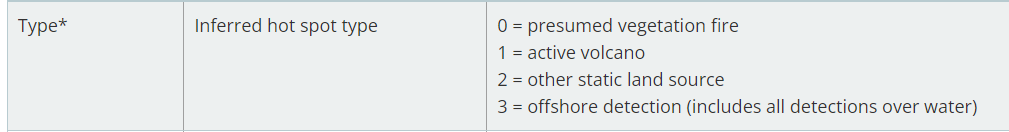

Source: https://www.earthdata.nasa.gov/learn/find-data/near-real-time/firms/vnp14imgtdlnrt

In [ ]:
dfHSArg = dfHSArg[dfHSArg['type'] == 0]

#### Review of Dataframe after first processing (optional)

In [ ]:
dfHSArg

# **Data visualization and selection of study area points**

##### Creating a GeoDataframe from original Pandas Dataframe

In [ ]:
# Convertion of pandas dataframe into a geopandas dataframe with geometry set as points from latitude and longitude
gdfHSArg = gpd.GeoDataFrame(
    dfHSArg, 
    geometry=gpd.points_from_xy(dfHSArg['longitude'], dfHSArg['latitude']), 
    crs='epsg:4326')

##### Loading Argentina and study area vector layers

In [ ]:
# Reading vector layers
Country = gpd.read_file('/content/ArgentinaIGN.shp')
StudyArea = gpd.read_file('/content/DeltaParana.shp')

#### **Visualization of processed data in the map**

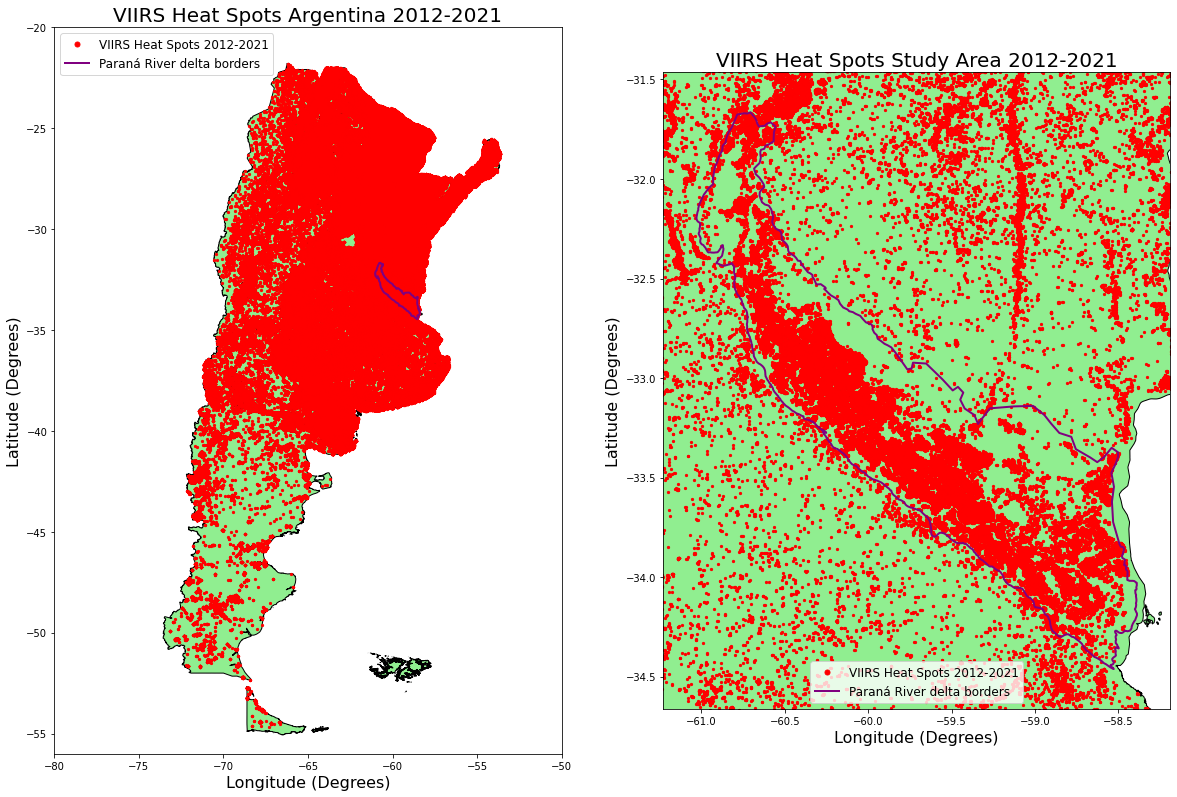

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20, 20))

# First subplot
Country.plot( ax = axs[0], facecolor= 'lightgreen', edgecolor='black')
gdfHSArg.plot(ax = axs[0], markersize = 5, color = 'red', alpha = 1)
StudyArea.plot(ax = axs[0], facecolor = 'none', edgecolor = 'purple', linewidth = 2)

legStudyArea = mlines.Line2D([], [], color = 'purple', marker= 'None', linestyle = '-', linewidth = 2)
legHSArg = mlines.Line2D([], [], color = 'red', marker = 'o', markersize = 5, linestyle='None')
axs[0].legend(handles=[legHSArg, legStudyArea],
              labels=['VIIRS Heat Spots 2012-2021', 'Paraná River delta borders'],
              fontsize = 12,
              loc='best')

axs[0].set_ylim(-56, -20)
axs[0].set_xlim(-80, -50)
axs[0].set_title('VIIRS Heat Spots Argentina 2012-2021', fontsize = 20)
axs[0].set_xlabel('Longitude (Degrees)', fontsize = 16)
axs[0].set_ylabel('Latitude (Degrees)', fontsize = 16)

# Second subplot
Country.plot( ax = axs[1], facecolor= 'lightgreen', edgecolor='black')
gdfHSArg.plot(ax = axs[1], markersize = 5, color = 'red', alpha = 1)
StudyArea.plot(ax = axs[1], facecolor = 'none', edgecolor = 'purple', linewidth = 2)

legStudyArea = mlines.Line2D([], [], color = 'purple', marker= 'None', linestyle = '-', linewidth = 2)
legHSArg = mlines.Line2D([], [], color = 'red', marker = 'o', markersize = 5, linestyle='None')
axs[1].legend(handles=[legHSArg, legStudyArea],
              labels=['VIIRS Heat Spots 2012-2021', 'Paraná River delta borders'],
              fontsize = 12,
              loc='best')

xlong, ylat = getCoordsSHP(StudyArea)
axs[1].set_xlim([xlong.min() - 0.2, xlong.max() + 0.2])
axs[1].set_ylim([ylat.min() - 0.2, ylat.max() + 0.2])
axs[1].set_title('VIIRS Heat Spots Study Area 2012-2021', fontsize = 20)
axs[1].set_xlabel('Longitude (Degrees)', fontsize = 16)
axs[1].set_ylabel('Latitude (Degrees)', fontsize = 16)

plt.savefig('HSArgentina-StudyArea.png') # Uncomment if you want to download the image

plt.show()

##### Run the following code to download the image with the visualization of heatspots

In [ ]:
files.download('HSArgentina-StudyArea.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### **Filtering of data by study area**

In [ ]:
# Use of within() method to filter original GeoDataframe
filtergdfHSArg = gdfHSArg[gdfHSArg.geometry.within(StudyArea.geometry.iloc[0])]

In [ ]:
filtergdfHSArg.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 57553 entries, 45 to 2065292
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   latitude   57553 non-null  float64 
 1   longitude  57553 non-null  float64 
 2   acq_date   57553 non-null  object  
 3   type       57553 non-null  int64   
 4   year_acq   57553 non-null  object  
 5   month_acq  57553 non-null  object  
 6   geometry   57553 non-null  geometry
dtypes: float64(2), geometry(1), int64(1), object(3)
memory usage: 3.5+ MB


##### Visualization of filtered data by study area in the map

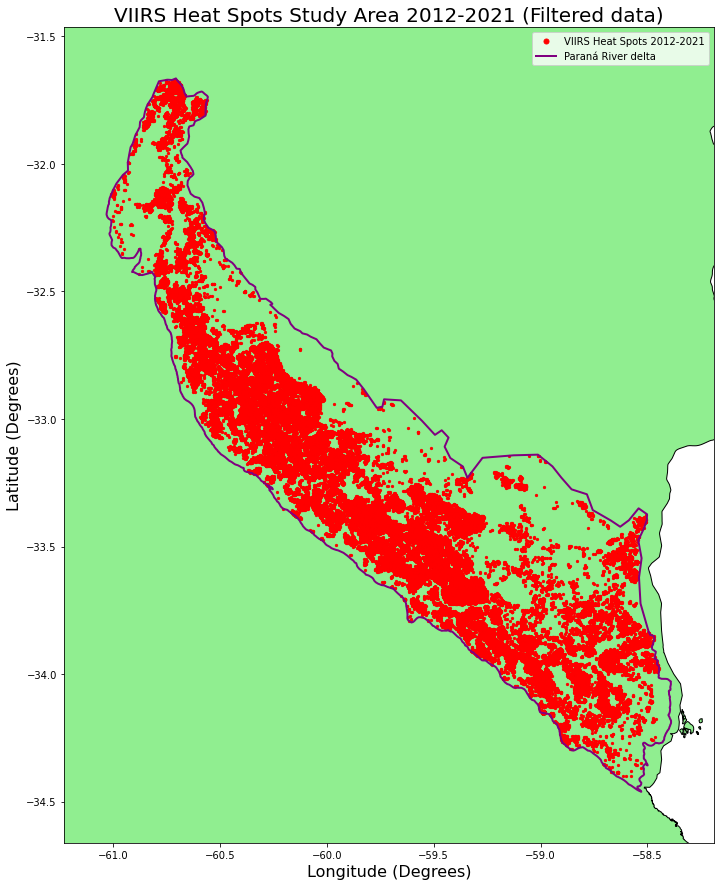

In [ ]:
fig, axs = plt.subplots(figsize=(15, 15))

xlong, ylat = getCoordsSHP(StudyArea)
axs.set_xlim([xlong.min() - 0.2, xlong.max() + 0.2])
axs.set_ylim([ylat.min() - 0.2, ylat.max() + 0.2])
axs.set_title('VIIRS Heat Spots Study Area 2012-2021 (Filtered data)', fontsize = 20)
axs.set_xlabel('Longitude (Degrees)', fontsize = 16)
axs.set_ylabel('Latitude (Degrees)', fontsize = 16)

Country.plot( ax = axs, facecolor= 'lightgreen', edgecolor='black') 
filtergdfHSArg.plot(ax = axs, markersize=5, color='red', alpha = 1)
StudyArea.plot(ax = axs, facecolor = 'none', edgecolor='purple', linewidth=2)

legStudyArea = mlines.Line2D([], [], color = 'purple', marker= 'None', linestyle = '-', linewidth = 2)
legHSArg = mlines.Line2D([], [], color = 'red', marker = 'o', markersize = 5, linestyle='None')
axs.legend(handles=[legHSArg, legStudyArea], labels=['VIIRS Heat Spots 2012-2021', 'Paraná River delta'], loc='best')

plt.savefig('HSStudyArea.png') # Uncomment if you want to download the image

plt.show()

##### Run the following code to download the image with the visualization of heatspots

In [ ]:
files.download('HSStudyArea.png')

FileNotFoundError: ignored

##### Run this code to download the final GeoDataframe as a .csv file

In [ ]:
gdfHSArgCopy = filtergdfHSArg.copy()
gdfHSArgCopy = gdfHSArgCopy.drop('geometry', axis = 1)
gdfHSArgCopy.to_csv("gdfHSArgStudyArea.csv", index=False)
files.download("gdfHSArgStudyArea.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>